In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train.csv')
center=pd.read_csv('fulfilment_center_info.csv')
floral=pd.read_csv('floral_info.csv')
test=pd.read_csv('test_QoiMO9B.csv')

##### Data Pre-Processing

In [3]:
print("The Shape of Demand dataset :",data.shape)
print("The Shape of Fulmilment Center Information dataset :",center.shape)
print("The Shape of Floral information dataset :",floral.shape)
print("The Shape of Test dataset :",test.shape)

The Shape of Demand dataset : (456548, 9)
The Shape of Fulmilment Center Information dataset : (77, 6)
The Shape of Floral information dataset : (51, 4)
The Shape of Test dataset : (32573, 8)


In [4]:
data.head()

,id,week,center_id,floral_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [5]:
test['num_orders']=123456 ### Assigning random number for Target Variable of Test Data.

In [6]:
test.head()

,id,week,center_id,floral_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1028232,146,55,1885,158.11,159.11,0,0,123456
1,1127204,146,55,1993,160.11,159.11,0,0,123456
2,1212707,146,55,2539,157.14,159.14,0,0,123456
3,1082698,146,55,2631,162.02,162.02,0,0,123456
4,1400926,146,55,1248,163.93,163.93,0,0,123456


In [7]:
center.head()

,center_id,city_code,region_code,payment_type,op_area,date
0,11,679,56,TYPE_A,3.7,1/1/2013
1,13,590,56,TYPE_B,6.7,2/1/2013
2,124,590,56,TYPE_C,4.0,3/1/2013
3,66,648,34,TYPE_A,4.1,4/1/2013
4,94,632,34,TYPE_C,3.6,5/1/2013


In [8]:
floral.head()

,floral_id,category,cat,meal_name
0,1885,Beverages,Iris,Orchids
1,1993,Beverages,Iris,Tulip
2,2539,Beverages,Iris,3
3,1248,Beverages,Orchids,4
4,2631,Beverages,Orchids,5


In [9]:
data=pd.concat([data,test],axis=0)

In [10]:
data=data.merge(center,on='center_id',how='left')

In [11]:
data=data.merge(floral,on='floral_id',how='left')

In [12]:
data.head()

,id,week,center_id,floral_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,payment_type,op_area,date,category,cat,meal_name
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,4/1/2015,Beverages,Iris,Orchids
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,4/1/2015,Beverages,Iris,Tulip
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,4/1/2015,Beverages,Iris,3
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,4/1/2015,Beverages,Orchids,27
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,4/1/2015,Beverages,Orchids,5


In [13]:
data.isnull().sum()

id                       0
week                     0
center_id                0
floral_id                0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
payment_type             0
op_area                  0
date                     0
category                 0
cat                      0
meal_name                0
dtype: int64

##### Deriving New Features

In [14]:
#Discount Amount
data['discount amount']=data['base_price']-data['checkout_price']

In [15]:
#Discount Percent
data['discount percent'] = ((data['base_price']-data['checkout_price'])/data['base_price'])*100

In [16]:
#Discount Y/N
data['discount y/n'] = [1 if x>0 else 0 for x in (data['base_price']-data['checkout_price'])]

In [17]:
data=data.sort_values(['center_id', 'floral_id', 'week']).reset_index()

In [18]:
#Compare Week Price
data['compare_week_price'] = data['checkout_price'] - data['checkout_price'].shift(1) 

In [19]:
data['compare_week_price'][data['week']==1]=0

In [20]:
data=data.sort_values(by='index').reset_index().drop(['level_0','index'],axis=1)

In [21]:
# Compare Week Price Y/N
data['compare_week_price y/n'] = [1 if x>0 else 0 for x in data['compare_week_price']]

In [22]:
data.head()

,id,week,center_id,floral_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,payment_type,op_area,date,category,cat,meal_name,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,4/1/2015,Beverages,Iris,Orchids,15.46,10.151684,1,0.0,0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,4/1/2015,Beverages,Iris,Tulip,-1.00,-0.736214,0,0.0,0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,4/1/2015,Beverages,Iris,3,1.00,0.736052,1,0.0,0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,4/1/2015,Beverages,Orchids,27,98.03,22.405321,1,0.0,0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,4/1/2015,Beverages,Orchids,5,-1.00,-0.412371,0,0.0,0


In [23]:
data.isnull().sum()

id                        0
week                      0
center_id                 0
floral_id                 0
checkout_price            0
base_price                0
emailer_for_promotion     0
homepage_featured         0
num_orders                0
city_code                 0
region_code               0
payment_type              0
op_area                   0
date                      0
category                  0
cat                       0
meal_name                 0
discount amount           0
discount percent          0
discount y/n              0
compare_week_price        0
compare_week_price y/n    0
dtype: int64

##### Train Test Split

In [24]:
train=data[data['week'].isin(range(1,146))]
test=data[data['week'].isin(range(146,156))]

In [25]:
print("The Shape of Train dataset :",train.shape)
print("The Shape of Test dataset :",test.shape)

The Shape of Train dataset : (456548, 22)
The Shape of Test dataset : (32573, 22)


<AxesSubplot:>

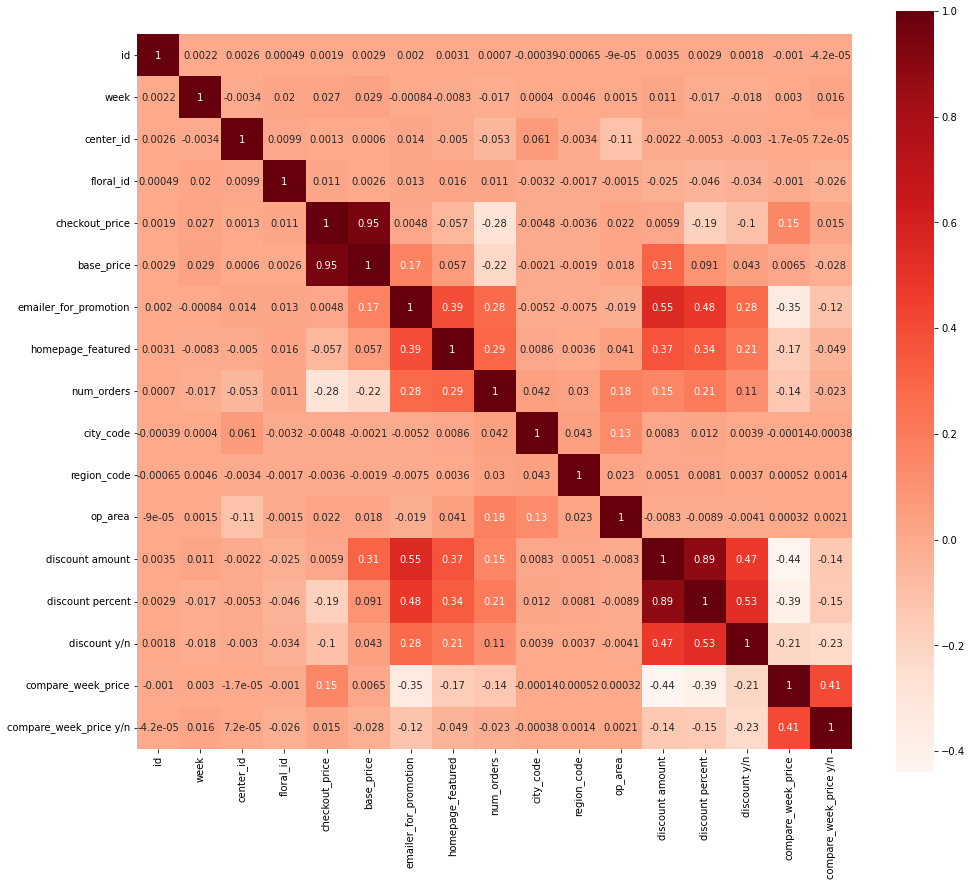

In [26]:
plt.figure(figsize=(16,14))
sns.heatmap(train.corr(),annot=True, square=True, cmap='Reds')

Type_A payment_type have the highest number of Orders placed and Type_C has the least.

In [27]:
train['center_id'].nunique()


77

The are are 77 Fullfilment Centers in total.

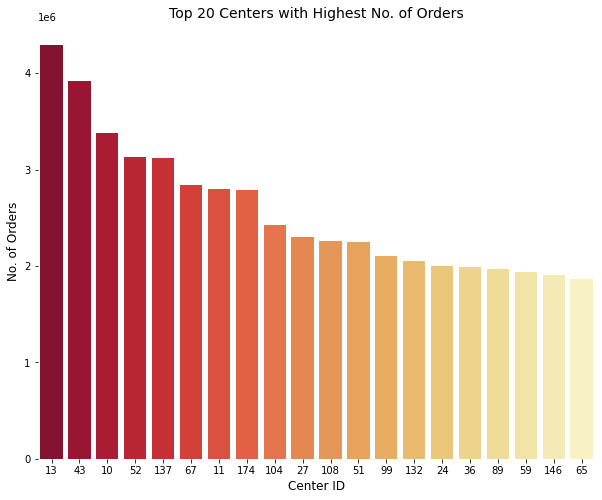

In [28]:
fig=plt.figure(figsize=(10,8))
plt.title('Top 20 Centers with Highest No. of Orders',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='center_id', data=train.groupby(['center_id','payment_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train.groupby(['center_id','payment_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20)['center_id']));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center ID',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


Initially, when we checked, which Center Type has the highest number of Orders, We found that Center Type_A has the highest number of orders, but now when we check individually, we could see that Center 13 of Type_B has the highest number of Orders. Let’s analyze the reason behind that.

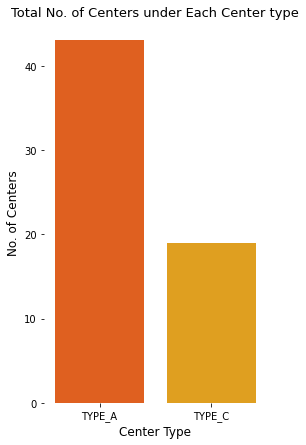

In [29]:
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Centers under Each Center type',fontdict={'fontsize':13})
sns.barplot(y=train.groupby(['center_id','payment_type']).num_orders.sum().reset_index()['payment_type'].value_counts(), x=train.groupby(['center_id','payment_type']).num_orders.sum().reset_index()['payment_type'].value_counts().index,palette='autumn',order=["TYPE_A","TYPE_C"]);
plt.ylabel('No. of Centers',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Type_A has the most number of orders because, Type_A has the most number of Centers - 43 Centers.

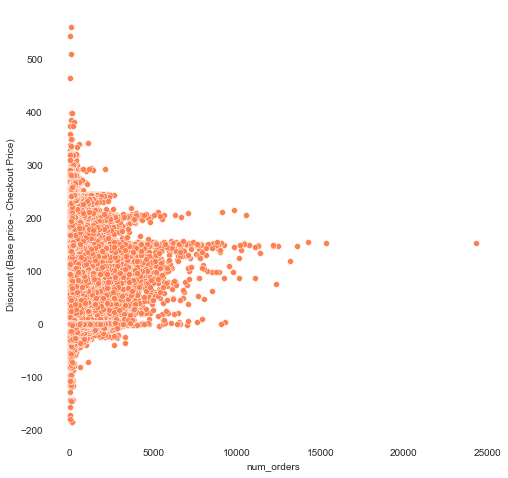

In [30]:
sns.set_style("white")
plt.figure(figsize=(8,8))
sns.scatterplot(y=train['base_price']-train['checkout_price'],x=train['num_orders'],color='coral')
plt.ylabel('Discount (Base price - Checkout Price)')
sns.despine(bottom = True, left = True)

We created a new feature: Discount which is the difference of base price and checkout price and tried to find out if there is any relationship between the discount and the number of orders. But surprisingly there are no good correlation between the discount and the number of orders.

When we analysed the trend of order placed over the weeks, we could see that the highest number of orders were received in week 48 and the lowest in week 62.

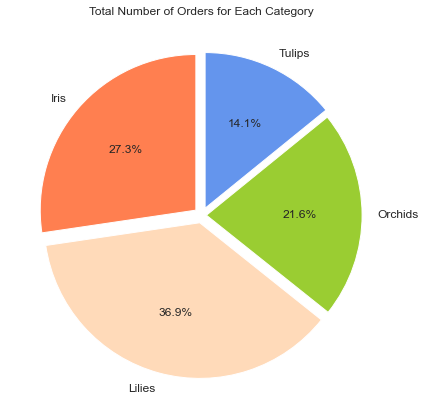

In [31]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(train.groupby(['cat']).num_orders.sum(),
    labels=train.groupby(['cat']).num_orders.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category')
plt.tight_layout()
plt.show()

In [32]:
list(data.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index().values[:,0])

[56, 34, 77, 85, 71, 23, 93, 35]

[28943, 26695, 27844, 31144, 29324, 36095, 39885, 35933, 39054, 38642, 39063, 31458, 25897, 22265, 24316, 23879, 38622, 37932, 40004, 38499, 44479, 43709, 44539, 29212, 31353, 33708, 32576, 31618, 32685, 43038, 41111, 50624, 42028, 40811, 40486, 42639, 29668, 29807, 32766, 32592, 34062, 30989, 31137, 33788, 39647, 38049, 30739, 30967, 26238, 26396, 9725, 27984, 29274, 14014, 32036, 34611, 43223, 40376, 38976, 36006, 43542, 14091, 29065, 29170, 35609, 38611, 38759, 30914, 23862, 24704, 24898, 30385, 28475, 34918, 29622, 25171, 26771, 27775, 27986, 30776, 25494, 28957, 35893, 34014, 31185, 30256, 31663, 37676, 35480, 31521, 34444, 30601, 33567, 32439, 31819, 33901, 15637, 33380, 27024]


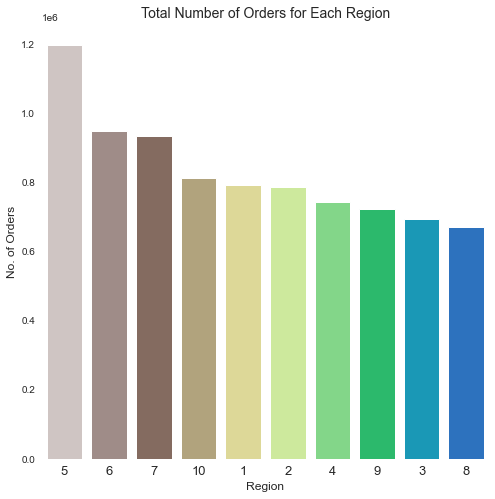

In [184]:
fig=plt.figure(figsize=(8,8))
sns.set_style("white")
plt.xticks(fontsize=13)
plt.title('Total Number of Orders for Each Region',fontdict={'fontsize':14})
df_female = []
for x in range(1,100):
    df_groupby_sex = data.groupby(['floral_id','week']).get_group((1062,x)).num_orders.sum()
    df_female.append(df_groupby_sex)

print(df_female)
sns.barplot(y='num_orders', x='week', data=data.groupby('week').num_orders.sum().sort_values(ascending=False).reset_index(),palette='terrain_r',order=list(data.groupby('week').num_orders.sum().head(10).sort_values(ascending=False).reset_index().values[:,0]));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Region',fontdict={'fontsize':12})
plt.xticks()
sns.despine(bottom = True, left = True);



Also when we checked the number of orders with respect to Region, we could see that Region - 56 has the highest number of orders - 60.5M orders which is almost 35M orders higher than the Region with second highest number of orders - Region 34 - 24M orders. 

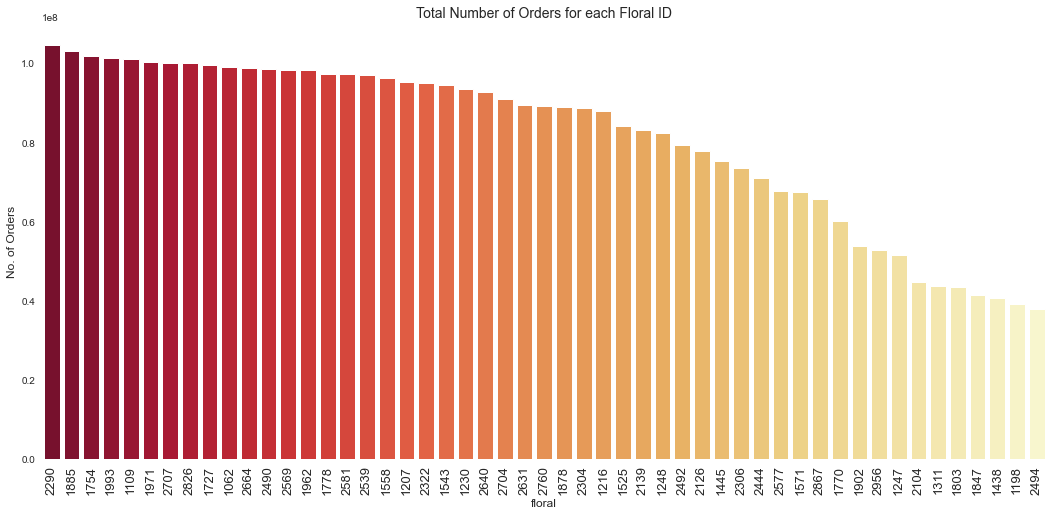

In [34]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=13)
plt.title('Total Number of Orders for each Floral ID',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='floral_id', data=data.groupby('floral_id').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby('floral_id').num_orders.sum().sort_values(ascending=False).reset_index()['floral_id'].values));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('floral',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


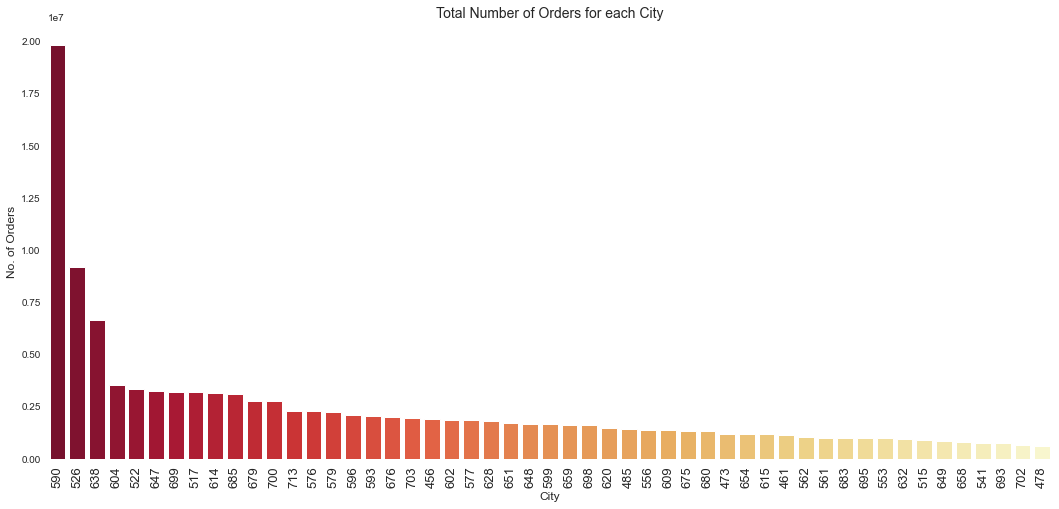

In [35]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=13)
plt.title('Total Number of Orders for each City',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='city_code', data=train.groupby('city_code').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(train.groupby('city_code').num_orders.sum().sort_values(ascending=False).reset_index()['city_code'].values));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('City',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


Also when we checked the number of orders with respect to City, we could see that City - 590 has the highest number of orders - 18.5M orders which is almost 10M orders higher than the City with second highest number of orders - City 526 - 8.6M orders.

##### Encoding City 

As per our observation from our barchart of the City against the number of orders. There the high significant difference between the Top 3 cities which has the highest number of orders. Therefore, in our first approach we will encode the City with Highest No. of Orders as CH1, City with 2nd Highest No. of Orders as CH2 and City with 3rd Highest No. of Orders as CH3 and rest all of the cities which does not have much significant differences between the number of orders as CH4.

In [36]:
city4={590:'CH1', 526:'CH2', 638:'CH3'}
data['city_enc_4']=data['city_code'].map(city4)
data['city_enc_4']=data['city_enc_4'].fillna('CH4')

In [37]:
data['city_enc_4'].value_counts()

CH4    362341
CH1     58708
CH2     46589
CH3     21483
Name: city_enc_4, dtype: int64

In [38]:
data.head()

,id,week,center_id,floral_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,payment_type,op_area,date,category,cat,meal_name,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n,city_enc_4
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,4/1/2015,Beverages,Iris,Orchids,15.46,10.151684,1,0.0,0,CH4
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,4/1/2015,Beverages,Iris,Tulip,-1.00,-0.736214,0,0.0,0,CH4
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,4/1/2015,Beverages,Iris,3,1.00,0.736052,1,0.0,0,CH4
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,4/1/2015,Beverages,Orchids,27,98.03,22.405321,1,0.0,0,CH4
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,4/1/2015,Beverages,Orchids,5,-1.00,-0.412371,0,0.0,0,CH4


In [39]:
data.isnull().sum()

id                        0
week                      0
center_id                 0
floral_id                 0
checkout_price            0
base_price                0
emailer_for_promotion     0
homepage_featured         0
num_orders                0
city_code                 0
region_code               0
payment_type              0
op_area                   0
date                      0
category                  0
cat                       0
meal_name                 0
discount amount           0
discount percent          0
discount y/n              0
compare_week_price        0
compare_week_price y/n    0
city_enc_4                0
dtype: int64

##### Copying to New DataFrame

In [40]:
datax=data.copy()
datax.head()

,id,week,center_id,floral_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,payment_type,op_area,date,category,cat,meal_name,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n,city_enc_4
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,4/1/2015,Beverages,Iris,Orchids,15.46,10.151684,1,0.0,0,CH4
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,4/1/2015,Beverages,Iris,Tulip,-1.00,-0.736214,0,0.0,0,CH4
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,4/1/2015,Beverages,Iris,3,1.00,0.736052,1,0.0,0,CH4
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,4/1/2015,Beverages,Orchids,27,98.03,22.405321,1,0.0,0,CH4
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,4/1/2015,Beverages,Orchids,5,-1.00,-0.412371,0,0.0,0,CH4


##### Enoding all the Categorical Features

In [41]:
datax['center_id']=datax['center_id'].astype('object')
datax['floral_id']=datax['floral_id'].astype('object')
datax['region_code']=datax['region_code'].astype('object')

In [42]:
obj=datax[['center_id','floral_id','region_code','payment_type','category','cat','city_enc_4']]
num=datax.drop(['center_id','floral_id','region_code','payment_type','category','cat','city_enc_4'],axis=1)

In [43]:
encode1=pd.get_dummies(obj,drop_first = True)

In [44]:
datax=pd.concat([num,encode1],axis=1)

In [45]:
datax.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,date,meal_name,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,floral_id_1109,floral_id_1198,floral_id_1207,floral_id_1216,floral_id_1230,floral_id_1247,floral_id_1248,floral_id_1311,floral_id_1438,floral_id_1445,floral_id_1525,floral_id_1543,floral_id_1558,floral_id_1571,floral_id_1727,floral_id_1754,floral_id_1770,floral_id_1778,floral_id_1803,floral_id_1847,floral_id_1878,floral_id_1885,floral_id_1902,floral_id_1962,floral_id_1971,floral_id_1993,floral_id_2104,floral_id_2126,floral_id_2139,floral_id_2290,floral_id_2304,floral_id_2306,floral_id_2322,floral_id_2444,floral_id_2490,floral_id_2492,floral_id_2494,floral_id_2539,floral_id_2569,floral_id_2577,floral_id_2581,floral_id_2631,floral_id_2640,floral_id_2664,floral_id_2704,floral_id_2707,floral_id_2760,floral_id_2826,floral_id_2867,floral_id_2956,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,payment_type_TYPE_B,payment_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cat_Lilies,cat_Orchids,cat_Tulips,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4
0,1379560,1,136.83,152.29,0,0,177,647,2.0,4/1/2015,Orchids,15.46,10.151684,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1466964,1,136.83,135.83,0,0,270,647,2.0,4/1/2015,Tulip,-1.00,-0.736214,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1346989,1,134.86,135.86,0,0,189,647,2.0,4/1/2015,3,1.00,0.736052,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1338232,1,339.50,437.53,0,0,54,647,2.0,4/1/2015,27,98.03,22.405321,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1448490,1,243.50,242.50,0,0,40,647,2.0,

In [46]:
abs(train.corr()['num_orders']).sort_values(ascending=False)

num_orders                1.000000
homepage_featured         0.294490
checkout_price            0.282108
emailer_for_promotion     0.277147
base_price                0.222306
discount percent          0.205188
op_area                   0.176976
discount amount           0.152950
compare_week_price        0.137849
discount y/n              0.111766
center_id                 0.053035
city_code                 0.041596
region_code               0.029744
compare_week_price y/n    0.022898
week                      0.017210
floral_id                 0.010597
id                        0.000702
Name: num_orders, dtype: float64

##### Base Model

Building base model by splitting the last 10 week of the train dataset as test.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [48]:
train=datax[datax['week'].isin(range(1,136))]
test=datax[datax['week'].isin(range(136,146))]

X_train=train.drop(['id','num_orders','week'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week'],axis=1)
y_test=test['num_orders']

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

ValueError: could not convert string to float: '4/1/2015'

##### Linear Model 2 : Applying Standard Scaling & Log Transformation

In [ ]:
sc=StandardScaler()

cat=datax.drop(['checkout_price','base_price','discount amount','discount percent','compare_week_price'],axis=1)
num=datax[['checkout_price','base_price','discount amount','discount percent','compare_week_price']]
scal= pd.DataFrame(sc.fit_transform(num),columns=num.columns)
datas=pd.concat([scal,cat],axis=1)

train=datas[datas['week'].isin(range(1,136))]
test=datas[datas['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week'],axis=1)
y_train=np.log(train['num_orders']) #Applying Log Transformation on the Target Feature

X_test=test.drop(['id','num_orders','week'],axis=1)
y_test=np.log(test['num_orders']) #Applying Log Transformation on the Target Feature

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSLE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.7273897685603294
Test Score : 0.7032174789414379
R squared : 0.7032174789414379
RMSLE : 0.6347859384960003


##### Copying to New DataFrame

In [ ]:
datay=datas.copy()

In [ ]:
datay['Quarter']=(datas['week']/13).astype('int64')

In [ ]:
datay['Quarter'] = datay['Quarter'].map({0:'Q1',
                         1:'Q2',
                         2:'Q3',
                         3:'Q4',
                         4:'Q1',
                         5:'Q2',
                         6:'Q3',
                         7:'Q4',
                         8:'Q1',
                         9:'Q2',
                         10:'Q3',
                         11:'Q4'})

In [ ]:
datay['Quarter'].value_counts()

Q4    124839
Q3    124225
Q2    122386
Q1    117671
Name: Quarter, dtype: int64

In [ ]:
datay['Year']=(datas['week']/52).astype('int64')

In [ ]:
datay['Year'] = datay['Year'].map({0:'Y1',
                         1:'Y2',
                         2:'Y3'})

In [ ]:
objy=datay[['Quarter', 'Year']]
numy=datay.drop(['Quarter', 'Year'],axis=1)

encode1y=pd.get_dummies(objy,drop_first = True)
encode1y.head()

datay=pd.concat([numy,encode1y],axis=1)

In [ ]:
datay.head()

,checkout_price,base_price,discount amount,discount percent,compare_week_price,id,week,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,meal_name,discount y/n,compare_week_price y/n,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,payment_type_TYPE_B,payment_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y2,Year_Y3
0,-1.281184,-1.259867,-0.124498,0.399910,-0.003326,1379560,1,0,0,177,647,2.0,1885,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,-1.281184,-1.362517,-0.467581,-0.562824,-0.003326,1466964,1,0,0,270,647,2.0,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,-1.294058,-1.362329,-0.425894,-0.432643,-0.003326,1346989,1,0,0,189,647,2.0,2539,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0.043267,0.518969,1.596548,1.483406,-0.003326,1338232,1,0,0,54,647,2.0,2139,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,-0.584095,-0.697293

##### Applying Log Transformation on the Target Feature

In [ ]:
datay['num_orders']=np.log1p(datay['num_orders'])

In [ ]:
train=datay[datay['week'].isin(range(1,146))]
def outliers_3(col):
    q3=round(train[col].quantile(0.75),6)
    q1=round(train[col].quantile(0.25),6)
    iqr=q3-q1
    lw = q1 - (3*iqr)
    hw = q3 + (3*iqr)  
    uo=train[train[col]>hw].shape[0]
    lo=train[train[col]<lw].shape[0]
    print('Number of Upper Outliers :',uo)
    print('Number of Lower Outliers :',lo)
    print('Percentage of Outliers :',((uo+lo)/train.shape[0])*100)

In [ ]:
outliers_3('num_orders')

Number of Upper Outliers : 0
Number of Lower Outliers : 0
Percentage of Outliers : 0.0


In [ ]:
datay.head()

,checkout_price,base_price,discount amount,discount percent,compare_week_price,id,week,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,meal_name,discount y/n,compare_week_price y/n,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,payment_type_TYPE_B,payment_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y2,Year_Y3
0,-1.281184,-1.259867,-0.124498,0.399910,-0.003326,1379560,1,0,0,5.181784,647,2.0,1885,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,-1.281184,-1.362517,-0.467581,-0.562824,-0.003326,1466964,1,0,0,5.602119,647,2.0,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,-1.294058,-1.362329,-0.425894,-0.432643,-0.003326,1346989,1,0,0,5.247024,647,2.0,2539,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0.043267,0.518969,1.596548,1.483406,-0.003326,1338232,1,0,0,4.007333,647,2.0,2139,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_test=test['num_orders'] 

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSLE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.729044005536329
Test Score : 0.7044818626021018
R squared : 0.7044818626021018
RMSLE : 0.6246876620674016


##### Linear Model doesn't seems to be yielding much better result. Therefore, we are proceeding with advanced models & ensemble techniques.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

##### XGBOOST

In [ ]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_test=test['num_orders']

xgb = XGBRegressor(max_depth = 9,
    learning_rate=0.5,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 4)

xgb.fit(X_train,y_train)
print('Train Score :',xgb.score(X_train,y_train))
print('Test Score :',xgb.score(X_test,y_test))

predictions = xgb.predict(X_test)
print('Explained Variance :',explained_variance_score(predictions,y_test))
print("RMSLE :",np.sqrt(mean_squared_error(y_test,predictions)))

[10:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[10:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train Score : 0.8749334058281198
Test Score : 0.7993480417778567
Explained Variance : 0.7591825753078987
RMSLE : 0.5147455008140966


In [ ]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_test=test['num_orders']

xgb = XGBRegressor(max_depth = 9,
    learning_rate=0.5,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 4)

xgb.fit(X_train,y_train)
print('Train Score :',xgb.score(X_train,y_train))
print('Test Score :',xgb.score(X_test,y_test))

predictions = xgb.predict(X_test)
print('Explained Variance :',explained_variance_score(predictions,y_test))
print("RMSLE :",np.sqrt(mean_squared_error(y_test,predictions)))

[10:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[10:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train Score : 0.8724990851414355
Test Score : 0.8062805885179527
Explained Variance : 0.7728066753471856
RMSLE : 0.5057750812906661


##### LightBoost Regressor

In [ ]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_test=test['num_orders']

LGB=LGBMRegressor(boosting_type='gbdt',
        max_depth=8,
        learning_rate=0.5,
        n_estimators=100,
        n_jobs=1)

LGB.fit(X_train, y_train)
print(f'R^2 score for train:', {LGB.score(X_train, y_train)})
print(f'R^2 score for validation:', {LGB.score(X_test,y_test)})
LGBpred=LGB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,LGBpred))
print("RMSLE :",rmse)

R^2 score for train: {0.8345999522217169}
R^2 score for validation: {0.7931580662292781}
RMSLE : 0.5226249665189758


In [ ]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_test=test['num_orders']

LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.5,
        num_leaves =60,
        feature_fraction = 0.8,
        min_data_in_leaf= 100,
        bagging_fraction= 0.3,
        metric= 'rmse',
        random_state=100,
        seed=4)

LGB.fit(X_train, y_train)
print(f'R^2 score for train:', {LGB.score(X_train, y_train)})
print(f'R^2 score for validation:', {LGB.score(X_test,y_test)})
LGBpred=LGB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,LGBpred))
print("RMSLE :",rmse)

[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
R^2 score for train: {0.8468013597033721}
R^2 score for validation: {0.7984170591705683}
RMSLE : 0.5159382739365366


In [ ]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2'],axis=1)
y_test=test['num_orders']

LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.5,
        num_leaves =60,
        feature_fraction = 0.8,
        min_data_in_leaf= 100,
        bagging_fraction= 0.3,
        metric= 'rmse',
        random_state=100,
        seed=4)

LGB.fit(X_train, y_train)
print(f'R^2 score for train:', {LGB.score(X_train, y_train)})
print(f'R^2 score for validation:', {LGB.score(X_test,y_test)})
LGBpred=LGB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,LGBpred))
print("RMSLE :",rmse)

[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
R^2 score for train: {0.8458709495405191}
R^2 score for validation: {0.7994230472471464}
RMSLE : 0.5146492836205526


In [ ]:
# abs(train.corr())[abs(train.corr())>0.5]

Eliminating the features with multi-collinearity.

In [ ]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_test=test['num_orders']

LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.5,
        num_leaves =60,
        feature_fraction = 0.8,
        min_data_in_leaf= 100,
        bagging_fraction= 0.3,
        metric= 'rmse',
        random_state=100,
        seed=4)

LGB.fit(X_train, y_train)
print(f'R^2 score for train:', {LGB.score(X_train, y_train)})
print(f'R^2 score for validation:', {LGB.score(X_test,y_test)})
LGBpred=LGB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,LGBpred))
print("RMSLE :",rmse)

[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
R^2 score for train: {0.8446796266604825}
R^2 score for validation: {0.8039398188118226}
RMSLE : 0.50882162180264


##### CatBoost Regressor

In [ ]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_test=test['num_orders']

CGB=CatBoostRegressor(learning_rate=0.3,loss_function='RMSE',max_depth=9,verbose=False)

CGB.fit(X_train, y_train)
CGBpred=CGB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,CGBpred))
print("RMSLE :",rmse)

RMSLE : 0.49488916807145417


 With optimal hyper-parameter tuning, CatBoost Regressor performed well on the model and also gives the lease RMSLE : 0.502

Lets apply the best models on the real test data for hackathon submission.

##### XGBoost Regressor

##### Model 1

In [ ]:
train=datay[datay['week'].isin(range(1,146))]
test=datay[datay['week'].isin(range(146,156))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)


xgb = XGBRegressor(max_depth = 9,
    learning_rate=0.5,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 4)

xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)

[10:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [ ]:
Result=pd.DataFrame(predictions)
Result=np.expm1(Result).astype('int64')
Submission = pd.DataFrame(columns=['id', 'num_orders'])
Submission['id'] = test['id']
Submission['num_orders'] = Result.values
Submission.to_csv('Result XG 1.csv', index=False)

##### Model 2

In [ ]:
train=datay[datay['week'].isin(range(1,146))]
test=datay[datay['week'].isin(range(146,156))]

X_train=train.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code'],axis=1)

xgb = XGBRegressor(max_depth = 9,
    learning_rate=0.5,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 4)

xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)

[10:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [ ]:
Result=pd.DataFrame(predictions)
Result=np.expm1(Result).astype('int64')
Submission = pd.DataFrame(columns=['id', 'num_orders'])
Submission['id'] = test['id']
Submission['num_orders'] = Result.values
Submission.to_csv('Result XG 2.csv', index=False)

##### LightBoost Regressor

##### Model 1

In [ ]:
train=datay[datay['week'].isin(range(1,146))]
test=datay[datay['week'].isin(range(146,156))]

X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2'],axis=1)


LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.5,
        num_leaves =60,
        feature_fraction = 0.8,
        min_data_in_leaf= 100,
        bagging_fraction= 0.3,
        metric= 'rmse',
        random_state=100,
        seed=4)

LGB.fit(X_train, y_train)
LGBpred=LGB.predict(X_test)

[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


In [ ]:
Result=pd.DataFrame(LGBpred)
Result=np.expm1(Result).astype('int64')
Submission = pd.DataFrame(columns=['id', 'num_orders'])
Submission['id'] = test['id']
Submission['num_orders'] = Result.values
Submission.to_csv('Result LGB 1.csv', index=False)

##### Model 2

In [ ]:
train=datay[datay['week'].isin(range(1,146))]
test=datay[datay['week'].isin(range(146,156))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q3','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q3','base_price','discount percent'],axis=1)

LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.5,
        num_leaves =60,
        feature_fraction = 0.8,
        min_data_in_leaf= 100,
        bagging_fraction= 0.3,
        metric= 'rmse',
        random_state=100,
        seed=4)

LGB.fit(X_train, y_train)
LGBpred=LGB.predict(X_test)

[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


In [ ]:
Result=pd.DataFrame(LGBpred)
Result=np.expm1(Result).astype('int64')
Submission = pd.DataFrame(columns=['id', 'num_orders'])
Submission['id'] = test['id']
Submission['num_orders'] = Result.values
Submission.to_csv('Result LGB 2.csv', index=False)

##### Model 3

In [ ]:
train=datay[datay['week'].isin(range(1,146))]
test=datay[datay['week'].isin(range(146,156))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)

LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.5,
        num_leaves =60,
        feature_fraction = 0.8,
        min_data_in_leaf= 100,
        bagging_fraction= 0.3,
        metric= 'rmse',
        random_state=100,
        seed=4)

LGB.fit(X_train, y_train)
LGBpred=LGB.predict(X_test)

[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


In [ ]:
Result=pd.DataFrame(LGBpred)
Result=np.expm1(Result).astype('int64')
Submission = pd.DataFrame(columns=['id', 'num_orders'])
Submission['id'] = test['id']
Submission['num_orders'] = Result.values
Submission.to_csv('Result LGB 3.csv', index=False)

##### Model 4

In [ ]:
train=datay[datay['week'].isin(range(1,146))]
test=datay[datay['week'].isin(range(146,156))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','Quarter_Q3','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','Quarter_Q3','base_price','discount percent'],axis=1)

LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.5,
        num_leaves =60,
        feature_fraction = 0.8,
        min_data_in_leaf= 100,
        bagging_fraction= 0.3,
        metric= 'rmse',
        random_state=100,
        seed=4)

LGB.fit(X_train, y_train)
LGBpred=LGB.predict(X_test)

[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


In [ ]:
Result=pd.DataFrame(LGBpred)
Result=np.expm1(Result).astype('int64')
Submission = pd.DataFrame(columns=['id', 'num_orders'])
Submission['id'] = test['id']
Submission['num_orders'] = Result.values
Submission.to_csv('Result LGB 4.csv', index=False)

#### CatBoost Regressor

##### Model 1

In [ ]:
train=datay[datay['week'].isin(range(1,146))]
test=datay[datay['week'].isin(range(146,156))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','Quarter_Q3','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','Quarter_Q3','base_price','discount percent'],axis=1)

CGB=CatBoostRegressor(learning_rate=0.3,loss_function='RMSE',max_depth=9,verbose=False)

CGB.fit(X_train, y_train)
CGBpred=CGB.predict(X_test)

In [ ]:
Result=pd.DataFrame(CGBpred)
Result=np.expm1(Result).astype('int64')
Submission = pd.DataFrame(columns=['id', 'num_orders'])
Submission['id'] = test['id']
Submission['num_orders'] = Result.values
Submission.to_csv('Result Cat 1.csv', index=False)

##### Model 2

In [ ]:
train=datay[datay['week'].isin(range(1,146))]
test=datay[datay['week'].isin(range(146,156))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','Quarter_Q3','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','Quarter_Q3','base_price','discount percent'],axis=1)

CGB=CatBoostRegressor(learning_rate=0.1,loss_function='RMSE',max_depth=8,verbose=False)

CGB.fit(X_train, y_train)
CGBpred=CGB.predict(X_test)

In [ ]:
Result=pd.DataFrame(CGBpred)
Result=np.expm1(Result).astype('int64')
Submission = pd.DataFrame(columns=['id', 'num_orders'])
Submission['id'] = test['id']
Submission['num_orders'] = Result.values
Submission.to_csv('Result Cat 2.csv', index=False)

In [ ]:
Submission.head()

,id,num_orders
456548,1028232,183
456549,1127204,140
456550,1212707,124
456551,1082698,48
456552,1400926,33
